PROBLEM 1

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [190]:
df=pd.read_csv("cubic_zirconia.csv")

In [191]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [192]:
df.drop('Unnamed: 0', axis=1, inplace= True)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [194]:
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [103]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [104]:
df[df['depth'].isnull() == True ]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [201]:
df['depth'] = np.where(df['depth'].isnull() == True , df['depth'].mean(), df['depth'] )
df.loc[26:26]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,61.745147,57.0,4.5,4.44,2.74,803


In [106]:
for col in df.columns:
    count=(df[col] == 0).sum()
    print ('Number of zero values for the {} is {}'.format(col,count))

Number of zero values for the carat is 0
Number of zero values for the cut is 0
Number of zero values for the color is 0
Number of zero values for the clarity is 0
Number of zero values for the depth is 0
Number of zero values for the table is 0
Number of zero values for the x is 3
Number of zero values for the y is 3
Number of zero values for the z is 9
Number of zero values for the price is 0


In [107]:
df[df['y'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [108]:
df[df['z'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [109]:
df['x']=np.where(df['x'] == 0,df['x'].mean(),df['x'])
df['y']=np.where(df['y'] == 0,df['y'].mean(),df['y'])
df['z']=np.where(df['z'] == 0,df['z'].mean(),df['z'])

In [110]:
for col in df.columns:
    count=(df[col] == 0).sum()
    print ('Number of zero values for the {} is {}'.format(col,count))

Number of zero values for the carat is 0
Number of zero values for the cut is 0
Number of zero values for the color is 0
Number of zero values for the clarity is 0
Number of zero values for the depth is 0
Number of zero values for the table is 0
Number of zero values for the x is 0
Number of zero values for the y is 0
Number of zero values for the z is 0
Number of zero values for the price is 0


In [111]:
df.duplicated().sum()

34

In [112]:
df.drop_duplicates(inplace=True)

Univariate Analysis

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cut', ylabel='count'>

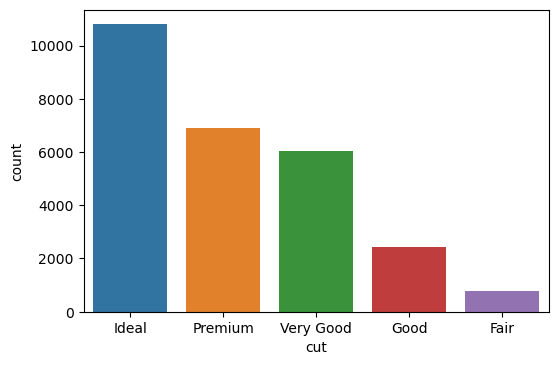

In [113]:
sns.countplot(df['cut'],order=df['cut'].value_counts().index)


C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='color', ylabel='count'>

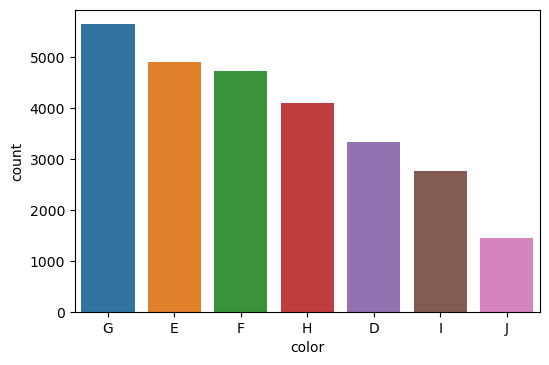

In [114]:
sns.countplot(df['color'],order=df['color'].value_counts().index)

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='clarity', ylabel='count'>

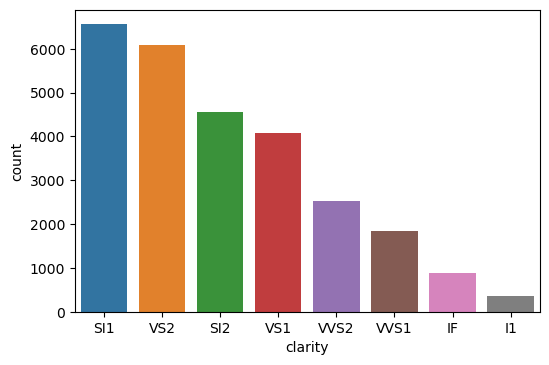

In [115]:
sns.countplot(df['clarity'],order=df['clarity'].value_counts().index)

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will 

Text(0.5, 1.0, 'x')

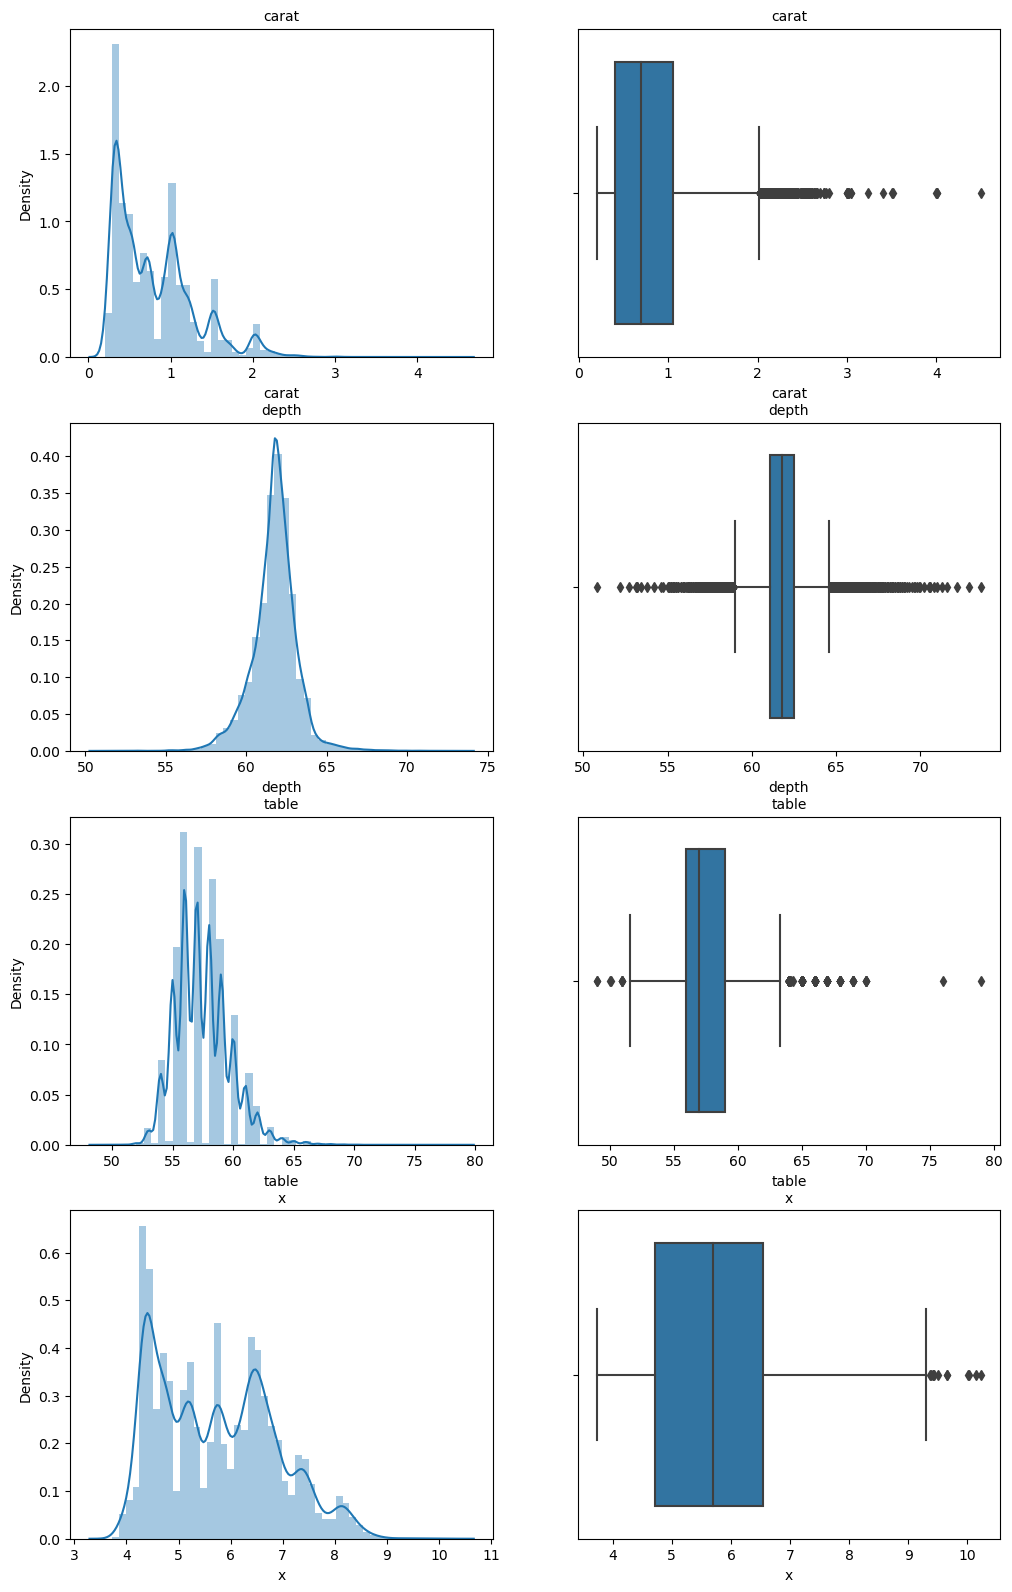

In [116]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
g = sns.distplot(df['carat'] , ax=axes[0][0])
g.set_title("carat",fontsize=10)

g = sns.boxplot(df['carat'] , orient = "v" , ax=axes[0][1])
g.set_title("carat",fontsize=10)

g = sns.distplot(df['depth'] , ax=axes[1][0])
g.set_title("depth",fontsize=10)

g = sns.boxplot(df['depth'] , orient = "v" , ax=axes[1][1])
g.set_title("depth",fontsize=10)

g = sns.distplot(df['table'] , ax=axes[2][0])
g.set_title("table",fontsize=10)

g = sns.boxplot(df['table'] , orient = "v" , ax=axes[2][1])
g.set_title("table",fontsize=10)

g = sns.distplot(df['x'] , ax=axes[3][0])
g.set_title("x",fontsize=10)

g = sns.boxplot(df['x'] , orient = "v" , ax=axes[3][1])
g.set_title("x",fontsize=10)



C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will 

Text(0.5, 1.0, 'price')

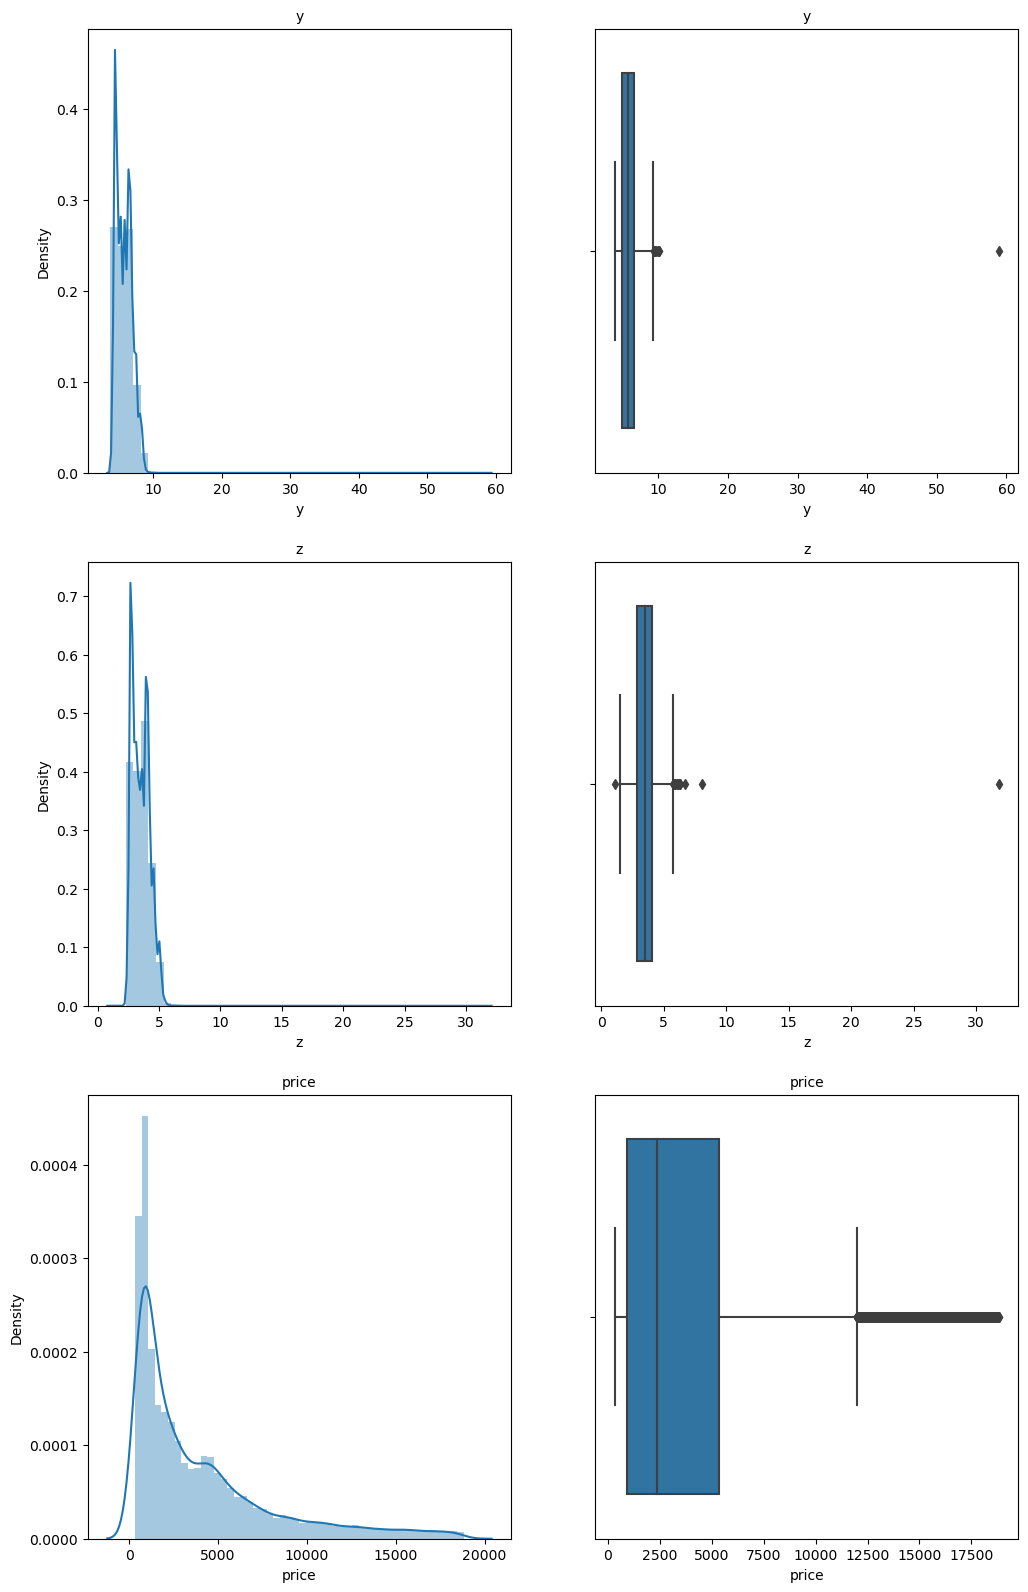

In [117]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 20)
g = sns.distplot(df['y'] , ax=axes[0][0])
g.set_title("y",fontsize=10)

g = sns.boxplot(df['y'] , orient = "v" , ax=axes[0][1])
g.set_title("y",fontsize=10)

g = sns.distplot(df['z'] , ax=axes[1][0])
g.set_title("z",fontsize=10)

g = sns.boxplot(df['z'] , orient = "v" , ax=axes[1][1])
g.set_title("z",fontsize=10)

g = sns.distplot(df['price'] , ax=axes[2][0])
g.set_title("price",fontsize=10)

g = sns.boxplot(df['price'] , orient = "v" , ax=axes[2][1])
g.set_title("price",fontsize=10)


In [118]:
from scipy.stats import zscore 

In [119]:
for col in df.columns:                                             #Applying Zscore on those columns which are not object type
    if df[col].dtype != 'object':
        df[[col]] = df[[col]].apply(zscore)

In [120]:
for col in df.columns:
    if df[col].dtype != 'object':
        print('Records with standard deviation greater than 3 for column {} is {}'.format(col,df[df[col] > 3][col].count()))
        print('Records with standard deviation less than -3 for column {} is {}'.format(col,df[df[col] < -3][col].count()))

Records with standard deviation greater than 3 for column carat is 208
Records with standard deviation less than -3 for column carat is 0
Records with standard deviation greater than 3 for column depth is 195
Records with standard deviation less than -3 for column depth is 168
Records with standard deviation greater than 3 for column table is 180
Records with standard deviation less than -3 for column table is 4
Records with standard deviation greater than 3 for column x is 16
Records with standard deviation less than -3 for column x is 0
Records with standard deviation greater than 3 for column y is 13
Records with standard deviation less than -3 for column y is 0
Records with standard deviation greater than 3 for column z is 15
Records with standard deviation less than -3 for column z is 1
Records with standard deviation greater than 3 for column price is 579
Records with standard deviation less than -3 for column price is 0


In [121]:
for col in df.columns:
    if df[col].dtype != 'object':
        df[[col]] = np.where(df[[col]] > 3, 3,df[[col]])
        df[[col]] = np.where(df[[col]] < -3, -3, df[[col]] )

In [122]:
for col in df.columns:
    if df[col].dtype != 'object':
        print('Records with standard deviation greater than 3 for column {} is {}'.format(col,df[df[col] > 3][col].count()))
        print('Records with standard deviation less than 3 for column {} is {}'.format(col,df[df[col] < -3][col].count()))

Records with standard deviation greater than 3 for column carat is 0
Records with standard deviation less than 3 for column carat is 0
Records with standard deviation greater than 3 for column depth is 0
Records with standard deviation less than 3 for column depth is 0
Records with standard deviation greater than 3 for column table is 0
Records with standard deviation less than 3 for column table is 0
Records with standard deviation greater than 3 for column x is 0
Records with standard deviation less than 3 for column x is 0
Records with standard deviation greater than 3 for column y is 0
Records with standard deviation less than 3 for column y is 0
Records with standard deviation greater than 3 for column z is 0
Records with standard deviation less than 3 for column z is 0
Records with standard deviation greater than 3 for column price is 0
Records with standard deviation less than 3 for column price is 0


Multivariate Analysis

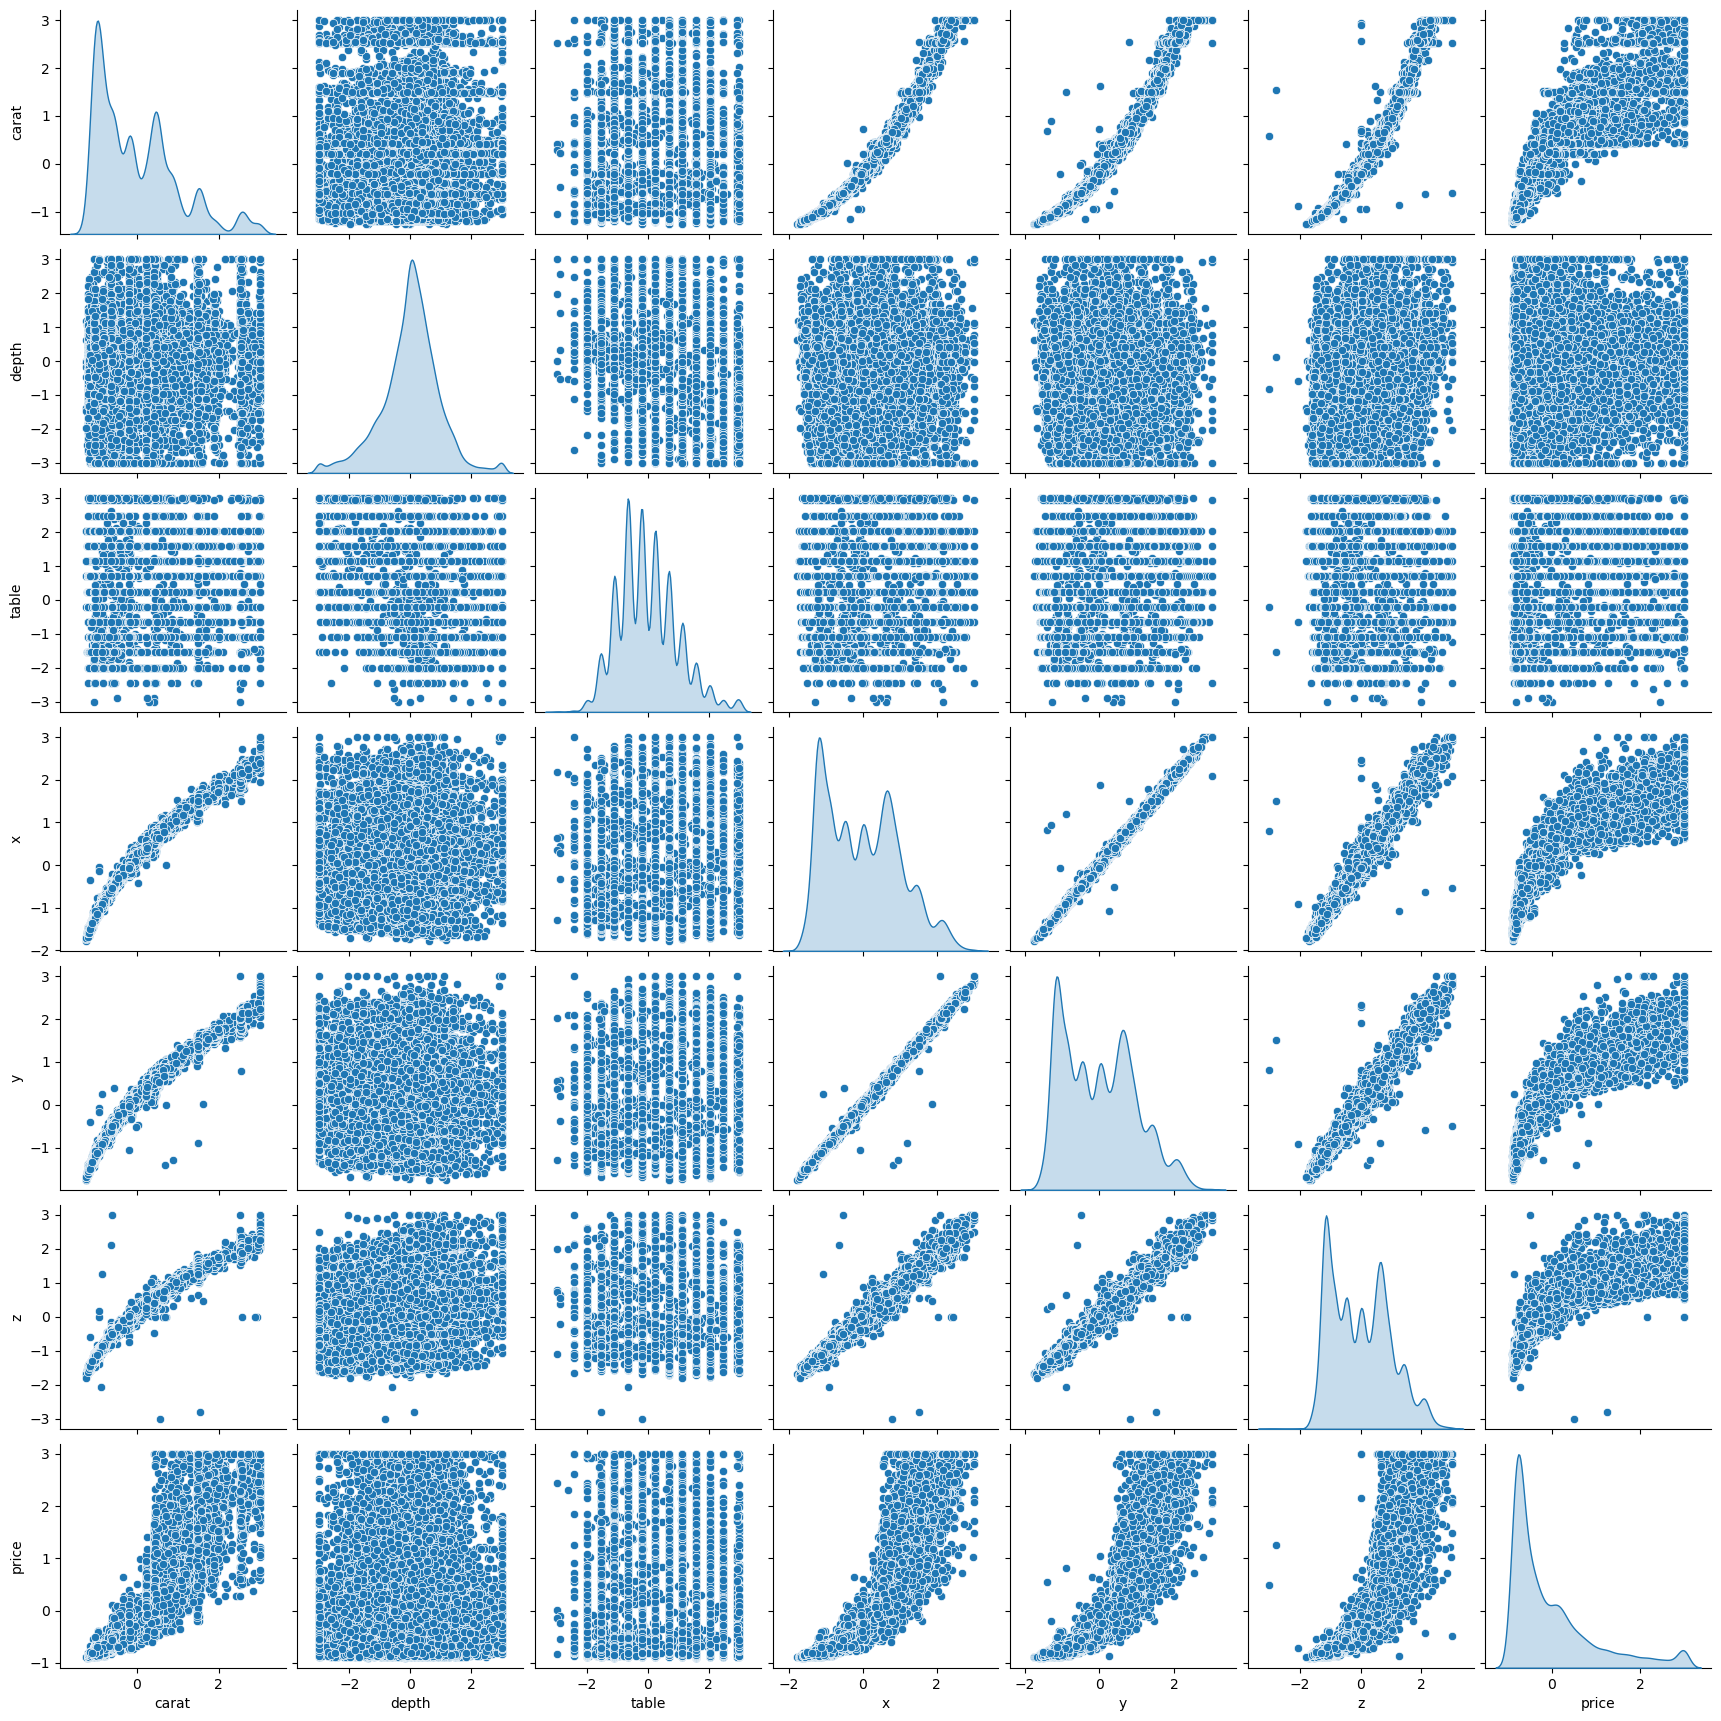

In [123]:
sns.pairplot(df, diag_kind='kde')

<AxesSubplot:>

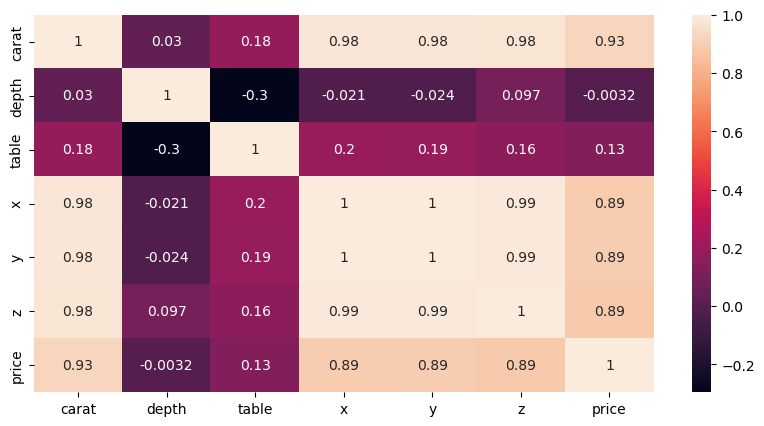

In [124]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.5+ MB


In [126]:
for col in df.columns: 
    if df[col].dtype == 'object': 
        print('\n')
        print('Column Name:',col)
        print(pd.Categorical(df[col].unique()))
        print(pd.Categorical(df[col].unique()).codes)
        df[col] = pd.Categorical(df[col]).codes



Column Name: cut
['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
[2 3 4 1 0]


Column Name: color
['E', 'G', 'F', 'D', 'H', 'J', 'I']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
[1 3 2 0 4 6 5]


Column Name: clarity
['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1']
Categories (8, object): ['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']
[2 1 7 4 6 5 3 0]


In [127]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.043547,2,1,2,0.254493,0.243737,-1.296119,-1.240179,-1.225070,-0.854828
1,-0.980684,3,3,1,-0.678194,0.243737,-1.162935,-1.094126,-1.169310,-0.734256
2,0.213713,4,1,7,0.326238,1.139749,0.275449,0.332030,0.336203,0.584584
3,-0.792095,2,2,4,-0.104232,-0.652274,-0.807778,-0.802022,-0.806872,-0.709892
4,-1.022593,2,2,6,-0.965174,0.691743,-1.225087,-1.119900,-1.239010,-0.785219


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int8   
 2   color    26933 non-null  int8   
 3   clarity  26933 non-null  int8   
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), int8(3)
memory usage: 3.0 MB


In [129]:
X=df.drop('price',axis=1)  
Y=df.pop('price')

In [130]:
clf=LinearRegression()

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=0)

In [133]:
clf.fit(X_train,y_train)

LinearRegression()

In [134]:
for idx,col_name in enumerate(X_train.columns):
    print('Coefficient for {} is {} '.format(col_name,clf.coef_[idx]))


Coefficient for carat is 1.481282677981137 
Coefficient for cut is 0.010083917229463175 
Coefficient for color is -0.06842218237395095 
Coefficient for clarity is 0.06815170792216897 
Coefficient for depth is -0.023274081905693467 
Coefficient for table is -0.04942172234870567 
Coefficient for x is -0.7432689437891166 
Coefficient for y is 0.5869799283806294 
Coefficient for z is -0.3244817634599856 


In [135]:
intercept=clf.intercept_
intercept

-0.1110817470111532

In [136]:
clf.score(X_train,y_train)

0.9023821032076993

In [137]:
clf.score(X_test,y_test)

0.9022481677471148

In [138]:
data_train=pd.concat([X_train,y_train],axis=1)

In [139]:
data_train.info()
data_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18853 entries, 8747 to 2732
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    18853 non-null  float64
 1   cut      18853 non-null  int8   
 2   color    18853 non-null  int8   
 3   clarity  18853 non-null  int8   
 4   depth    18853 non-null  float64
 5   table    18853 non-null  float64
 6   x        18853 non-null  float64
 7   y        18853 non-null  float64
 8   z        18853 non-null  float64
 9   price    18853 non-null  float64
dtypes: float64(7), int8(3)
memory usage: 1.2 MB


,carat,cut,color,clarity,depth,table,x,y,z,price
8747,0.821388,2,1,3,-1.108665,-0.204268,0.985762,0.976378,0.824101,0.442383
13821,-0.917821,2,0,5,-0.534703,-0.652274,-0.976478,-0.982439,-1.015971,-0.706909
13582,0.842343,1,5,2,0.971945,0.243737,0.825942,0.847509,0.949560,0.202481
9952,-1.169273,4,1,6,-0.749939,1.139749,-1.526970,-1.437779,-1.517808,-0.858308
25530,-0.624461,4,2,7,0.039258,-0.652274,-0.550290,-0.501326,-0.514133,-0.468747


In [140]:
import statsmodels.formula.api as smf

In [141]:
lm_train = smf.ols(formula='price ~ carat + cut + color + clarity + depth + table + x + y + z ',data=data_train).fit()

In [142]:
lm_train.params

Intercept   -0.111082
carat        1.481283
cut          0.010084
color       -0.068422
clarity      0.068152
depth       -0.023274
table       -0.049422
x           -0.743269
y            0.586980
z           -0.324482
dtype: float64

In [143]:
print(lm_train.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 1.935e+04
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:18:20   Log-Likelihood:                -4369.6
No. Observations:               18853   AIC:                             8759.
Df Residuals:                   18843   BIC:                             8838.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1111      0.009    -12.880      0.0

In [144]:
mse_test=np.mean((clf.predict(X_test)-y_test)**2)
mse_train=np.mean(clf.predict(X_train)-y_train)**2
#Calculating Mean Squared Error
print('MSE for training is {} and testing is {}'.format(mse_train,mse_test))

MSE for training is 2.717818610753163e-34 and testing is 0.09273158174263757


In [145]:
import math
print('Root mean squared error for training is {} and Testing is {}'.format(math.sqrt(mse_train),math.sqrt(mse_test)))

Root mean squared error for training is 1.6485807868446007e-17 and Testing is 0.304518606562288


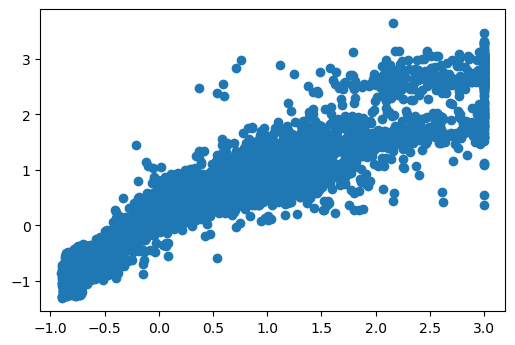

In [146]:
y_pred=clf.predict(X_test)
plt.rcParams['figure.dpi']=100
plt.scatter(y_test,y_pred)

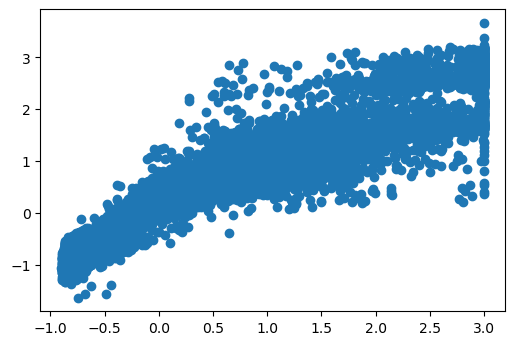

In [147]:
plt.rcParams['figure.dpi']=100
plt.scatter(y_train,clf.predict(X_train))

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,ix) for ix in range(X.shape[1])]

In [149]:
i=0
for column in X.columns:
    if i < 9:
        print (column , "- ", vif[i])
        i=i+1

carat -  28.82890352838194
cut -  4.381301495179967
color -  3.109208449263456
clarity -  4.294162429840121
depth -  4.552955241655365
table -  1.1821081076742452
x -  408.49361318189926
y -  401.82542382311624
z -  241.01782399612375


In [150]:
lm_train1= smf.ols(formula='price ~ carat + cut + color + clarity + depth + table ',data=data_train).fit()

In [151]:
print(lm_train1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                 2.612e+04
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:18:22   Log-Likelihood:                -5266.0
No. Observations:               18853   AIC:                         1.055e+04
Df Residuals:                   18846   BIC:                         1.060e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1602      0.009    -17.918      0.0

In [152]:
vif1=[variance_inflation_factor(X[['carat','cut','color','clarity','depth','table']].values,ix) 
 for ix in range(X[['carat','cut','color','clarity','depth','table']].shape[1])]

In [153]:
i=0
for column in X.columns:
    if i < 6:
        print (column , "- ", vif1[i])
        i=i+1


carat -  1.1868019749222014
cut -  4.353807740214415
color -  3.1013271636146573
clarity -  4.281423473034565
depth -  1.1194921794320156
table -  1.1611973695531603


In [154]:
#building another model
df1=pd.read_csv('cubic_zirconia.csv')

In [155]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

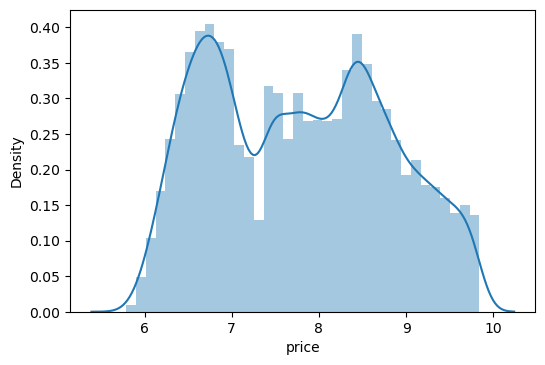

In [156]:
df1['price'] = np.log(df1['price'])
sns.distplot(df1['price'])

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

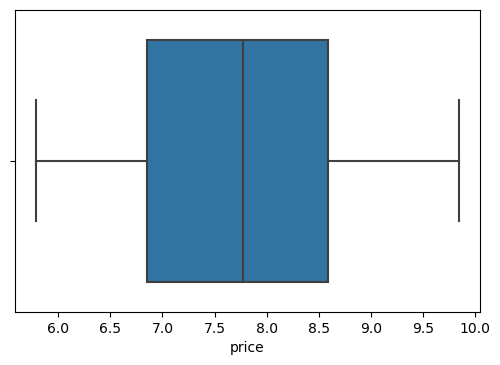

In [157]:
sns.boxplot(df1['price'])

In [158]:
df1.duplicated().sum()
df1.drop_duplicates(inplace=True)

In [159]:
df1.duplicated().sum()

0

In [160]:
df1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [161]:
df1['depth'] = np.where(df1['depth'].isnull() == True , df1['depth'].mean(), df1['depth'] )

In [162]:
df1['x']=np.where(df1['x'] == 0,df1['x'].mean(),df1['x'])
df1['y']=np.where(df1['y'] == 0,df1['y'].mean(),df1['y'])
df1['z']=np.where(df1['z'] == 0,df1['z'].mean(),df1['z'])

<AxesSubplot:>

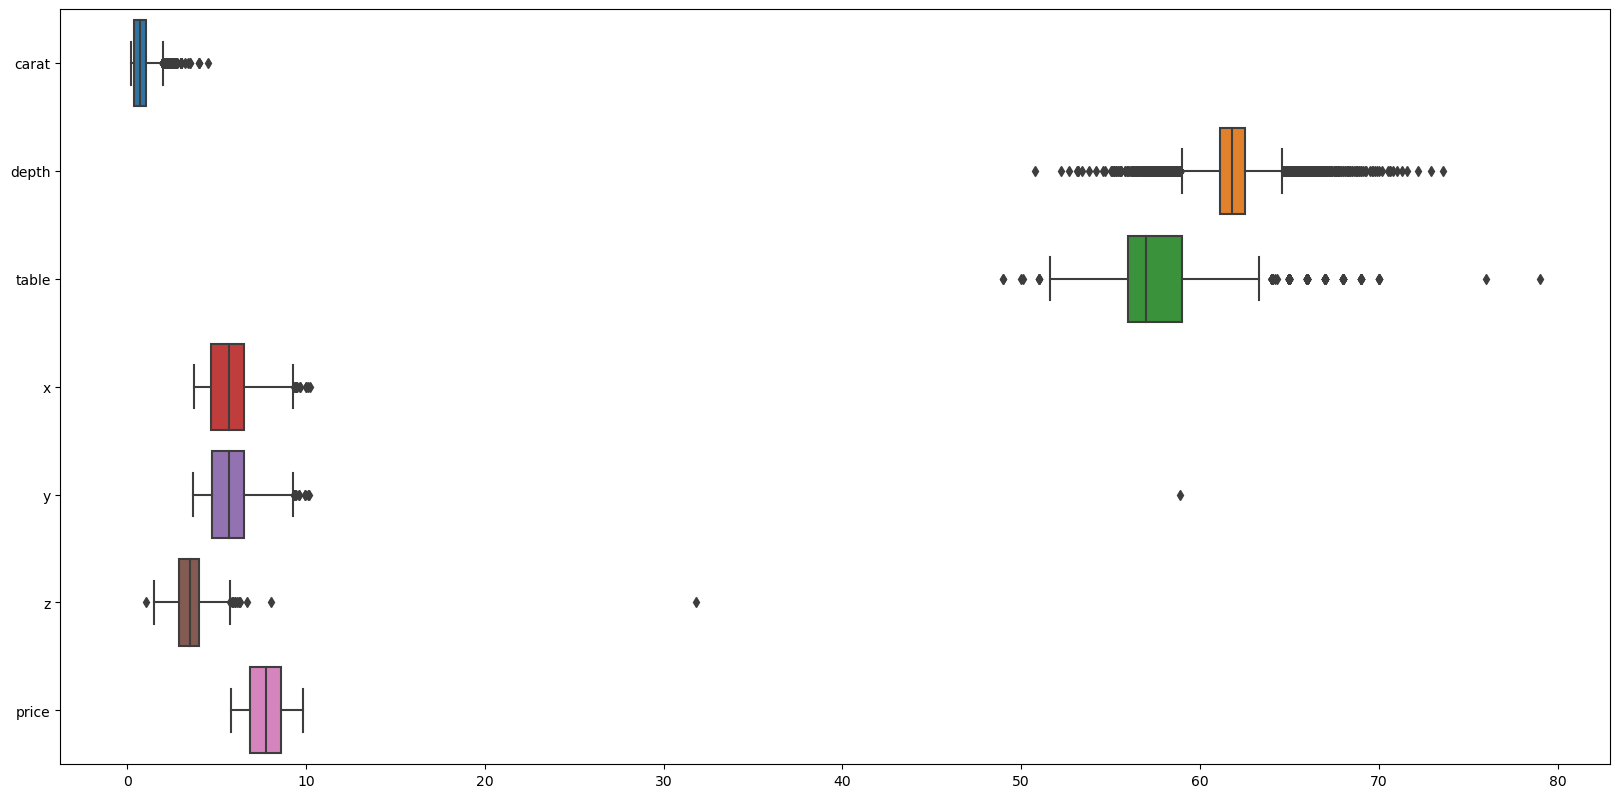

In [163]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df1,orient='h')

In [164]:
def out_treat(col):
    Q1,Q3=np.percentile(df1[col],[25,75])
    IQR=Q3-Q1
    Qmax=Q3 + 1.5*IQR
    Qmin=Q1 - 1.5*IQR
    df1[col]= np.where(df1[col] > Qmax, Qmax, df1[col] )
    df1[col]= np.where(df1[col] < Qmin, Qmin, df1[col] )


In [165]:
for col in df1.columns:
    if df1[col].dtype != 'object':
        out_treat(col)

<AxesSubplot:>

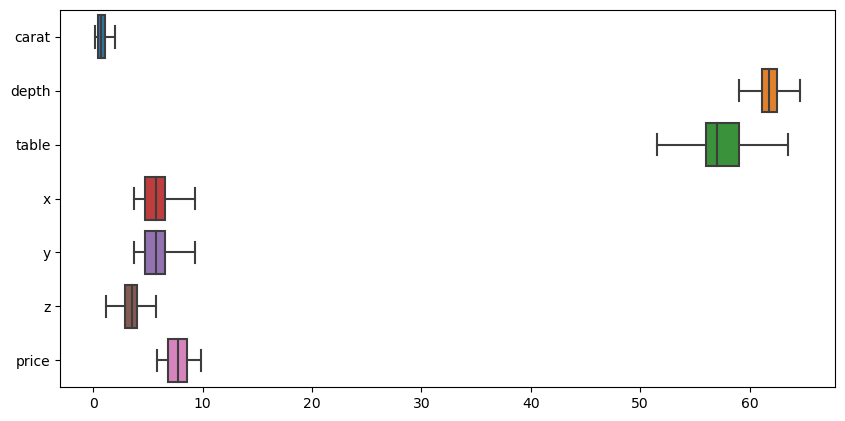

In [166]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df1,orient='h')

In [167]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.3+ MB


In [168]:
for col in df1.columns: 
    if df1[col].dtype == 'object': 
        print('\n')
        print('Column Name:',col)
        print(pd.Categorical(df1[col].unique()))
        print(pd.Categorical(df1[col].unique()).codes)
        df1[col] = pd.Categorical(df1[col]).codes



Column Name: cut
['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
[2 3 4 1 0]


Column Name: color
['E', 'G', 'F', 'D', 'H', 'J', 'I']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
[1 3 2 0 4 6 5]


Column Name: clarity
['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1']
Categories (8, object): ['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']
[2 1 7 4 6 5 3 0]


<AxesSubplot:>

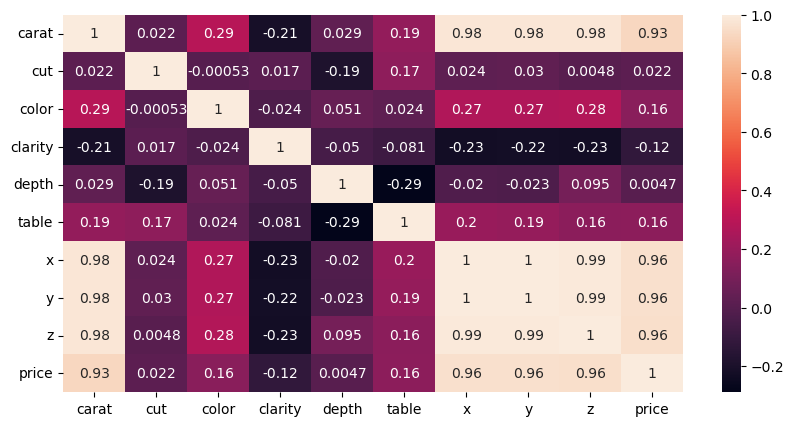

In [169]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),annot=True)

In [170]:
X1=df1.copy()
X1.drop('price',axis=1,inplace=True)
Y1=df1.pop('price')

In [171]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,Y1,test_size=.30,random_state=0)

In [172]:
data_train1=pd.concat([X_train1,y_train1],axis=1)
data_train1.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
8747,1.19,2,1,3,60.2,57.0,6.84,6.87,4.13,8.651199
13821,0.36,2,0,5,61.0,56.0,4.63,4.59,2.81,6.997596
13582,1.20,1,5,2,63.1,58.0,6.66,6.72,4.22,8.466321
9952,0.24,4,1,6,60.7,60.0,4.01,4.06,2.45,6.184149
25530,0.50,4,2,7,61.8,56.0,5.11,5.15,3.17,7.626570


In [173]:
lm3 = smf.ols(formula='price ~ color + clarity + x ',data=data_train1).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 1.127e+05
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:18:42   Log-Likelihood:                 635.06
No. Observations:               18853   AIC:                            -1262.
Df Residuals:                   18849   BIC:                            -1231.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4524      0.011    230.799      0.0

In [174]:
lm3.params

Intercept    2.452438
color       -0.070634
clarity      0.061969
x            0.920610
dtype: float64

In [175]:
vif2=[variance_inflation_factor(data_train1[['color','clarity','x']].values,ix) 
 for ix in range(data_train1[['color','clarity','x']].shape[1])]

In [176]:
clf3=LinearRegression()

In [177]:
i=0
for column in data_train1[['color','clarity','x']].columns:
    if i < 5:
        print (column , "- ", vif2[i])
        i=i+1

color -  3.654174232574307
clarity -  4.340332635216739
x -  6.693204279345197


In [178]:
X_train2=X_train1.copy()
X_train2.drop(['carat','cut','depth','table','y','z'],axis=1,inplace=True)
X_test2=X_test1.copy()
X_test2.drop(['carat','cut','depth','table','y','z'],axis=1,inplace=True)

In [179]:
clf3.fit(X_train2,y_train1)

LinearRegression()

In [180]:
clf3.score(X_train2,y_train1)

0.9472081247487468

In [181]:
clf3.score(X_test2,y_test1)

0.9468039003309685

In [182]:
mse_test1=np.mean((clf3.predict(X_test2)-y_test1)**2)
mse_train1=np.mean((clf3.predict(X_train2)-y_train1)**2)
print(' mean squared error for Test set is',mse_test1)
print(' mean squared error for Training set is',mse_train1)

 mean squared error for Test set is 0.05556891869202576
 mean squared error for Training set is 0.054735294847755196


In [183]:
import math
print('Root mean squared error for Test set is',math.sqrt(mse_test1))
print('Root mean squared error for Training set is',math.sqrt(mse_train1))

Root mean squared error for Test set is 0.23573060618431743
Root mean squared error for Training set is 0.23395575403856858


In [184]:
clf3.intercept_

2.4524377100425214

In [185]:
for idx,col_name in enumerate(X_train2.columns):
    print('The coefficient for {}  is {} '.format(col_name,clf3.coef_[idx]))


The coefficient for color  is -0.07063375156153978 
The coefficient for clarity  is 0.0619693025627653 
The coefficient for x  is 0.9206095882387271 


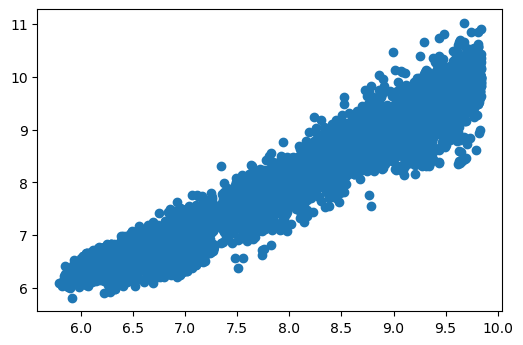

In [186]:
plt.rcParams['figure.dpi']=100
plt.scatter(y_train1,clf3.predict(X_train2))

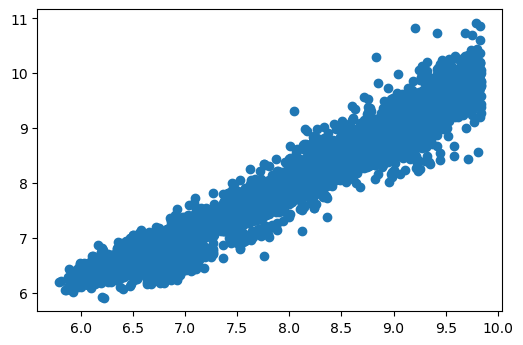

In [187]:
plt.rcParams['figure.dpi']=100
plt.scatter(y_test1,clf3.predict(X_test2))

PROBLEM 2

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [6]:
hol=pd.read_csv('Holiday_Package.csv')

In [7]:
hol.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [8]:
hol.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


In [9]:
hol.drop('Unnamed: 0', axis=1,inplace=True)

In [10]:
hol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [11]:
hol.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [12]:
hol.duplicated().sum()

0

Univariate Analysis

In [13]:
hol['Holliday_Package'].value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [14]:
hol['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will 

Text(0.5, 1.0, 'educ')

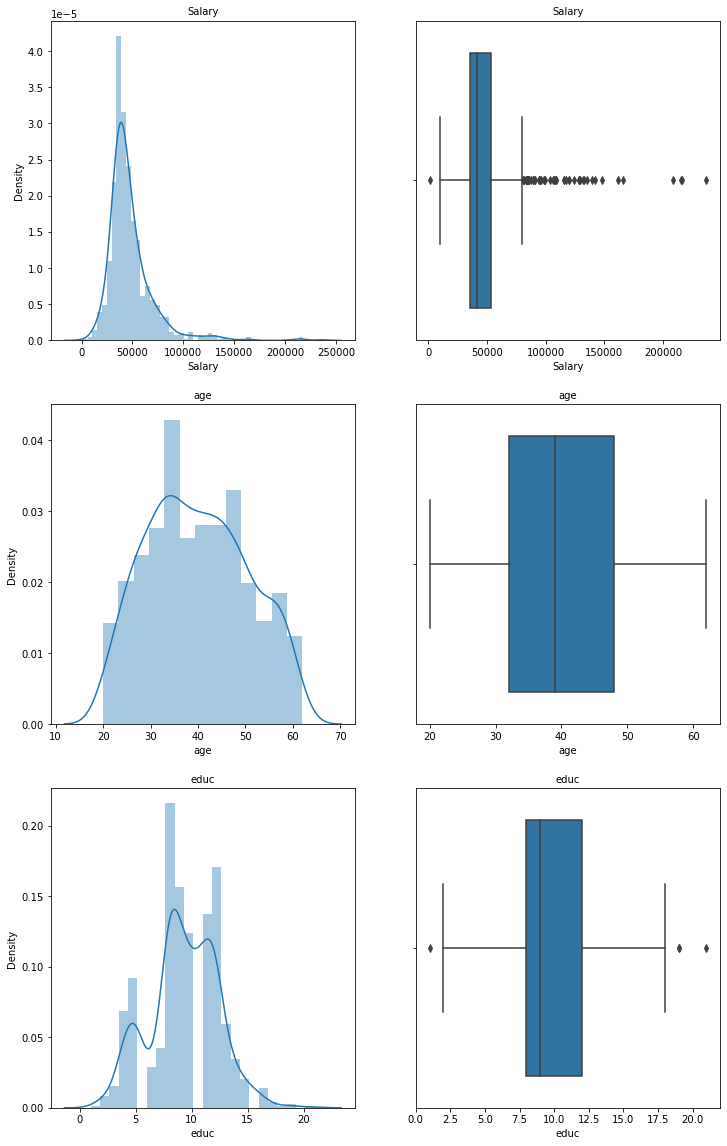

In [15]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 20)
h = sns.distplot(hol['Salary'] , ax=axes[0][0])
h.set_title("Salary",fontsize=10)

h = sns.boxplot(hol['Salary'] , orient = "v" , ax=axes[0][1])
h.set_title("Salary",fontsize=10)

h = sns.distplot(hol['age'] , ax=axes[1][0])
h.set_title("age",fontsize=10)

h = sns.boxplot(hol['age'] , orient = "v" , ax=axes[1][1])
h.set_title("age",fontsize=10)

h = sns.distplot(hol['educ'] , ax=axes[2][0])
h.set_title("educ",fontsize=10)

h = sns.boxplot(hol['educ'] , orient = "v" , ax=axes[2][1])
h.set_title("educ",fontsize=10)



In [16]:
def outlier_treatment(col):
    Q1,Q3=np.percentile(hol[col],[25,75])
    IQR=Q3-Q1
    Qmax=Q3 + 1.5*IQR
    Qmin=Q1 - 1.5*IQR
    hol[col]= np.where(hol[col] > Qmax, Qmax, hol[col] )
    hol[col]= np.where(hol[col] < Qmin, Qmin,hol[col ] )


In [17]:
outlier_treatment('Salary')
outlier_treatment('educ')

<AxesSubplot:>

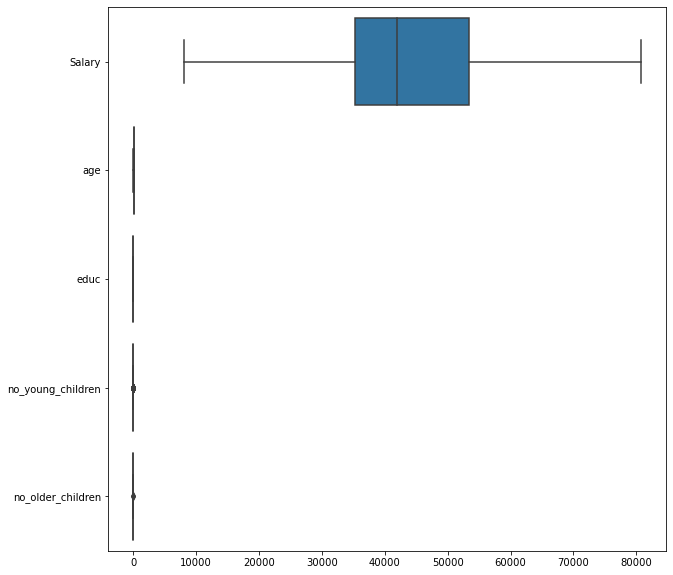

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(data=hol,orient='h')

<AxesSubplot:xlabel='Holliday_Package', ylabel='age'>

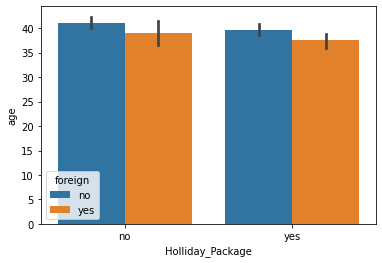

In [19]:
sns.barplot(y=hol['age'],x=hol['Holliday_Package'],hue=hol['foreign'])

<AxesSubplot:xlabel='Holliday_Package', ylabel='educ'>

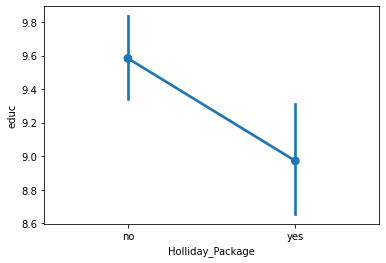

In [20]:
sns.pointplot(y=hol['educ'],x=hol['Holliday_Package'])

<AxesSubplot:xlabel='Holliday_Package', ylabel='Salary'>

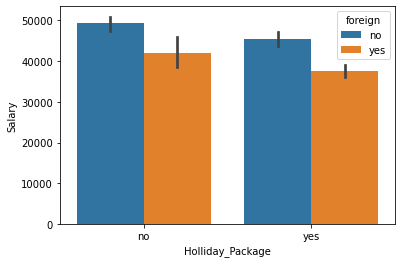

In [21]:
sns.barplot(y=hol['Salary'],x=hol['Holliday_Package'],hue=hol['foreign'])

<AxesSubplot:xlabel='Holliday_Package', ylabel='educ'>

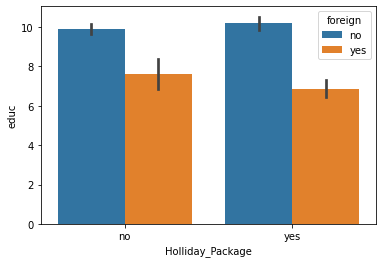

In [22]:
sns.barplot(y=hol['educ'],x=hol['Holliday_Package'],hue=hol['foreign'])

<AxesSubplot:xlabel='Holliday_Package', ylabel='no_young_children'>

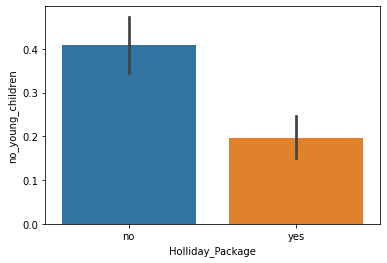

In [23]:
sns.barplot(y=hol['no_young_children'],x=hol['Holliday_Package'])

<AxesSubplot:xlabel='Holliday_Package', ylabel='no_older_children'>

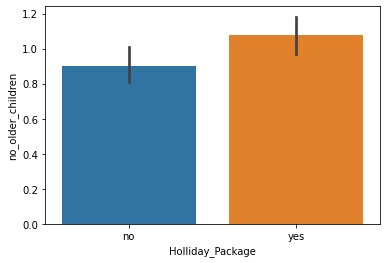

In [24]:
sns.barplot(y=hol['no_older_children'],x=hol['Holliday_Package'])

Multivariate Analysis

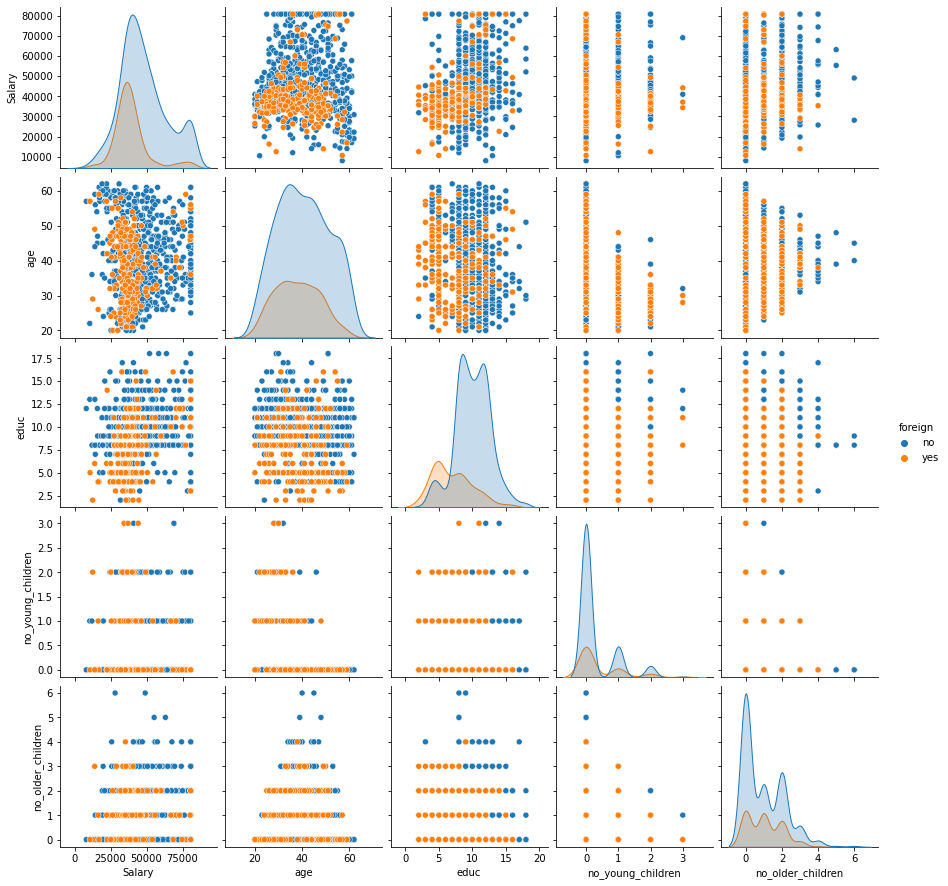

In [25]:
sns.pairplot(data=hol,diag_kind='kde',hue='foreign')

<AxesSubplot:>

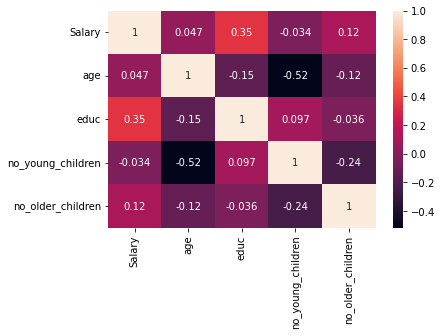

In [26]:
sns.heatmap(hol.corr(),annot=True)

In [27]:
hol['no_older_children'].value_counts()

0    393
2    208
1    198
3     55
4     14
6      2
5      2
Name: no_older_children, dtype: int64

In [28]:
hol['no_young_children'].value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [29]:
hol['no_older_children']=np.where(hol['no_older_children'] > 2, '>2',hol['no_older_children']  ) 
hol['no_young_children']=np.where(hol['no_young_children'] > 1, '>1', hol['no_young_children']  ) 

In [30]:
hol['foreign']=np.where(hol['foreign'] =='yes', '1', hol['foreign'])
hol['foreign']=np.where(hol['foreign'] =='no', '0', hol['foreign'])

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='no_older_children', ylabel='count'>

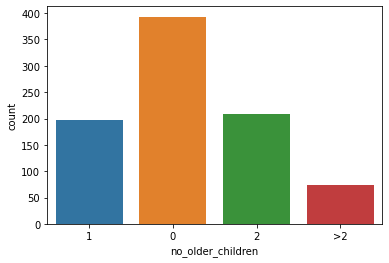

In [31]:
sns.countplot(hol['no_older_children'])

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='no_young_children', ylabel='count'>

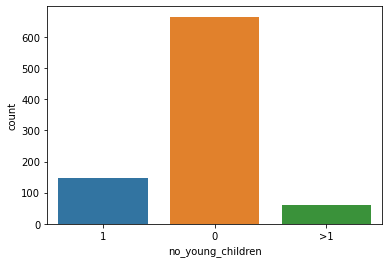

In [32]:
sns.countplot(hol['no_young_children'])

In [33]:
for col in hol.columns: 
    if hol[col].dtype == 'object': 
        print('\n')
        print('Column Name:',col)
        print(pd.Categorical(hol[col].unique()))
        print(pd.Categorical(hol[col].unique()).codes)
        hol[col] = pd.Categorical(hol[col]).codes



Column Name: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


Column Name: no_young_children
['1', '0', '>1']
Categories (3, object): ['0', '1', '>1']
[1 0 2]


Column Name: no_older_children
['1', '0', '2', '>2']
Categories (4, object): ['0', '1', '2', '>2']
[1 0 2 3]


Column Name: foreign
['0', '1']
Categories (2, object): ['0', '1']
[0 1]


In [34]:
hol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int8   
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    int8   
 5   no_older_children  872 non-null    int8   
 6   foreign            872 non-null    int8   
dtypes: float64(2), int64(1), int8(4)
memory usage: 24.0 KB


2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [35]:
X=hol.drop('Holliday_Package', axis=1)
Y=hol.pop('Holliday_Package')

In [36]:
X.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412.0,30,8.0,1,1,0
1,37207.0,45,8.0,0,1,0
2,58022.0,46,9.0,0,0,0
3,66503.0,31,11.0,2,0,0
4,66734.0,44,12.0,0,2,0


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [38]:
#LOGISTIC REGRESSION
lgmodel = LogisticRegression()
lgmodel=lgmodel.fit(X_train, y_train)
lgmodel

LogisticRegression()

In [55]:
train_pred_lg=lgmodel.predict(X_train)
test_pred_lg =lgmodel.predict(X_test)

In [56]:
modelhol=hol.copy()
modelhol['predict_log_class']=lgmodel.predict(X)

In [57]:
#LDA
clf = LinearDiscriminantAnalysis()
ldamodel=clf.fit(X_train, y_train)
ldamodel

LinearDiscriminantAnalysis()

In [58]:
train_pred_lda=ldamodel.predict(X_train)
test_pred_lda =ldamodel.predict(X_test)

In [59]:
modelhol['predict_LDA_class']=ldamodel.predict(X)

2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [60]:
#LOGISTIC REGRESSION

print("Accuracy score  for Logistic regression  train variables ")
lgmodel_train_score = lgmodel.score(X_train, y_train)
print (lgmodel_train_score)

Accuracy score  for Logistic regression  train variables 
0.5344262295081967


In [61]:
#LOGISTIC REGRESSION

print("Accuracy score for Logistic regression test variables ")
lgmodel_test_score = lgmodel.score(X_test, y_test)
lgmodel_test_score

Accuracy score for Logistic regression test variables 


0.5534351145038168

 confusion matrix Train variables for logistic regression 


Text(0.5, 1.0, 'Test Data')

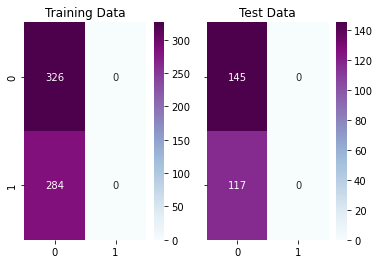

In [62]:
#LOGISTIC REGRESSION

print(" confusion matrix Train variables for logistic regression ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)


plot_0 = sns.heatmap(metrics.confusion_matrix(y_train, train_pred_lg),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap(metrics.confusion_matrix(y_test, test_pred_lg),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][1]);
a[0][1].set_title('Test Data')

In [63]:
#LOGISTIC REGRESSION

print("Logistic regression Classfication report  ")

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,train_pred_lg),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, test_pred_lg),'\n')

Logistic regression Classfication report  
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.53      1.00      0.70       326
           1       0.00      0.00      0.00       284

    accuracy                           0.53       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.53      0.37       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.55      1.00      0.71       145
           1       0.00      0.00      0.00       117

    accuracy                           0.55       262
   macro avg       0.28      0.50      0.36       262
weighted avg       0.31      0.55      0.39       262
 



C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC and ROC FOR Logistic regression
AUC for the Training Data: 0.591
AUC for the Test Data: 0.633


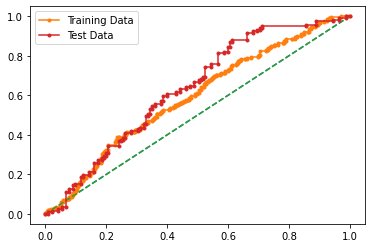

In [64]:
print("AUC and ROC FOR Logistic regression")
lg_pred_prob_train = lgmodel.predict_proba(X_train)
lg_pred_prob_train=lg_pred_prob_train[:,1]

lg_pred_prob_test = lgmodel.predict_proba(X_test)
lg_pred_prob_test =lg_pred_prob_test[:,1]

#training data
#AUC
lg_train_auc = metrics.roc_auc_score(y_train,lg_pred_prob_train)
print('AUC for the Training Data: %.3f' % lg_train_auc)
#roc curve
lg_train_fpr, lg_train_tpr, thresholds = metrics.roc_curve(y_train,lg_pred_prob_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lg_train_fpr, lg_train_tpr, marker='.',label = 'Training Data')


#test data
#AUC
lg_test_auc = metrics.roc_auc_score(y_test,lg_pred_prob_test)
print('AUC for the Test Data: %.3f' % lg_test_auc)
#roc curve
lg_test_fpr,lg_test_tpr, thresholds = metrics.roc_curve(y_test,lg_pred_prob_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lg_test_fpr, lg_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [65]:
#LINEAR DISCRIMINANT ANALYSIS

print("Accuracy score  for LDA  train variables ")
ldamodel_train_score = ldamodel.score(X_train, y_train)
print(ldamodel_train_score)

print("Accuracy score for LDA test variables ")
ldamodel_test_score = ldamodel.score(X_test, y_test)
print(ldamodel_test_score)

Accuracy score  for LDA  train variables 
0.6754098360655738
Accuracy score for LDA test variables 
0.6412213740458015


 confusion matrix Train variables for LDA 


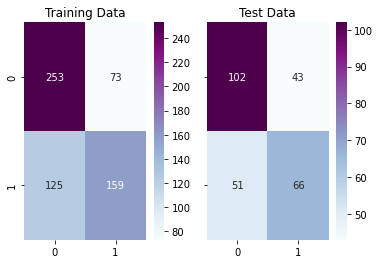

In [66]:
#LINEAR DISCRIMINANT ANALYSIS

print(" confusion matrix Train variables for LDA ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, train_pred_lda)),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, test_pred_lda)),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [67]:
#LINEAR DISCRIMINANT ANALYSIS

print("LDA Classfication report  ")

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,train_pred_lda),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, test_pred_lda),'\n')

LDA Classfication report  
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.78      0.72       326
           1       0.69      0.56      0.62       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.67      0.70      0.68       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262
 



AUC and ROC FOR LDA
AUC for the Training Data: 0.744
AUC for the Test Data: 0.704


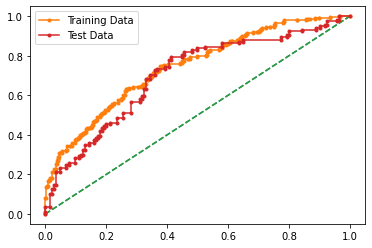

In [68]:
#LINEAR DISCRIMINANT ANALYSIS

print("AUC and ROC FOR LDA")
lda_pred_prob_train = ldamodel.predict_proba(X_train)
lda_pred_prob_train=lda_pred_prob_train[:,1]

lda_pred_prob_test = ldamodel.predict_proba(X_test)
lda_pred_prob_test=lda_pred_prob_test[:,1]

#training data
#AUC
lda_train_auc = metrics.roc_auc_score(y_train,lda_pred_prob_train)
print('AUC for the Training Data: %.3f' % lda_train_auc)
#roc curve
lda_train_fpr, lda_train_tpr, thresholds = metrics.roc_curve(y_train,lda_pred_prob_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.',label = 'Training Data')


#test data
#AUC
lda_test_auc = metrics.roc_auc_score(y_test,lda_pred_prob_test)
print('AUC for the Test Data: %.3f' % lda_test_auc)
#roc curve
lda_test_fpr, lda_test_tpr, thresholds = metrics.roc_curve(y_test,lda_pred_prob_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [70]:
cmetrics=classification_report(y_train,train_pred_lg,output_dict=True)
Z=pd.DataFrame(cmetrics).transpose()
lg_train_f1=round(Z.loc["1"][2],2)
lg_train_recall=round(Z.loc["1"][1],2)
lg_train_precision=round(Z.loc["1"][0],2)
Z

,precision,recall,f1-score,support
0,0.534426,1.000000,0.696581,326.000000
1,0.000000,0.000000,0.000000,284.000000
accuracy,0.534426,0.534426,0.534426,0.534426
macro avg,0.267213,0.500000,0.348291,610.000000
weighted avg,0.285611,0.534426,0.372271,610.000000


In [71]:
cmetrics=classification_report(y_test,test_pred_lg,output_dict=True)
Z=pd.DataFrame(cmetrics).transpose()
lg_test_f1=round(Z.loc["1"][2],2)
lg_test_recall=round(Z.loc["1"][1],2)
lg_test_precision=round(Z.loc["1"][0],2)
Z

C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.553435,1.000000,0.712531,145.000000
1,0.000000,0.000000,0.000000,117.000000
accuracy,0.553435,0.553435,0.553435,0.553435
macro avg,0.276718,0.500000,0.356265,262.000000
weighted avg,0.306290,0.553435,0.394340,262.000000


In [72]:
cmetrics=classification_report(y_train,train_pred_lda,output_dict=True)
Z=pd.DataFrame(cmetrics).transpose()
lda_train_f1=round(Z.loc["1"][2],2)
lda_train_recall=round(Z.loc["1"][1],2)
lda_train_precision=round(Z.loc["1"][0],2)
Z

,precision,recall,f1-score,support
0,0.669312,0.776074,0.718750,326.00000
1,0.685345,0.559859,0.616279,284.00000
accuracy,0.675410,0.675410,0.675410,0.67541
macro avg,0.677328,0.667966,0.667515,610.00000
weighted avg,0.676777,0.675410,0.671042,610.00000


In [73]:
cmetrics=classification_report(y_test,test_pred_lda,output_dict=True)
Z=pd.DataFrame(cmetrics).transpose()
lda_test_f1=round(Z.loc["1"][2],2)
lda_test_recall=round(Z.loc["1"][1],2)
lda_test_precision=round(Z.loc["1"][0],2)
Z

,precision,recall,f1-score,support
0,0.666667,0.703448,0.684564,145.000000
1,0.605505,0.564103,0.584071,117.000000
accuracy,0.641221,0.641221,0.641221,0.641221
macro avg,0.636086,0.633775,0.634317,262.000000
weighted avg,0.639354,0.641221,0.639687,262.000000


In [74]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
newhol = pd.DataFrame({'Logistic reg Train':[lgmodel_train_score,lg_train_auc,lg_train_recall,lg_train_precision,lg_train_f1],
        'Logistic reg Test':[lgmodel_test_score,lg_test_auc,lg_test_recall,lg_test_precision,lg_test_f1],
        'LDA Train':[ldamodel_train_score,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[ldamodel_test_score,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1]},index=index)
round(newhol,2)

,Logistic reg Train,Logistic reg Test,LDA Train,LDA Test
Accuracy,0.53,0.55,0.68,0.64
AUC,0.59,0.63,0.74,0.70
Recall,0.00,0.00,0.56,0.56
Precision,0.00,0.00,0.69,0.61
F1 Score,0.00,0.00,0.62,0.58


ROC curve for Train data 


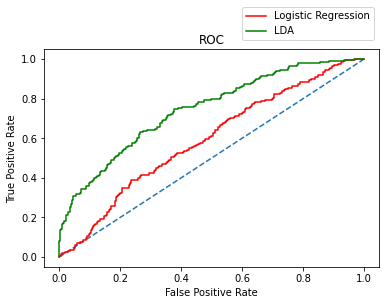

In [75]:
print("ROC curve for Train data ")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lg_train_fpr, lg_train_tpr,color='red',label="Logistic Regression")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

ROC curve for Test data


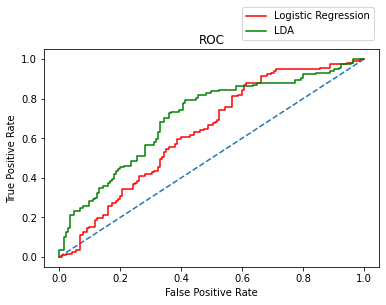

In [76]:
print("ROC curve for Test data")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lg_test_fpr, lg_test_tpr,color='red',label="Logistic Regression")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

THE END